In [1]:
import sys
import pandas as pd
import matplotlib
import seaborn
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [162]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [163]:
train.shape

(2000, 21)

In [164]:
test.shape

(1000, 21)

In [165]:
print(train.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [166]:
from sklearn.utils import shuffle
train = shuffle(train)

In [167]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
291,1563,0,1.7,1,10,0,16,0.1,151,7,...,410,572,3922,11,1,8,0,0,1,3
1186,1039,1,2.7,0,11,0,56,0.3,125,8,...,497,618,3105,14,8,5,0,1,1,2
1621,962,1,1.1,1,3,0,17,0.1,161,8,...,546,1424,3438,14,3,20,0,0,0,3
1382,1420,0,2.8,1,1,0,50,0.1,100,8,...,194,1393,763,17,1,17,0,1,1,0
448,1589,0,2.5,0,5,1,51,0.8,195,1,...,810,1743,2612,8,2,16,1,0,0,2


In [168]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [44]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


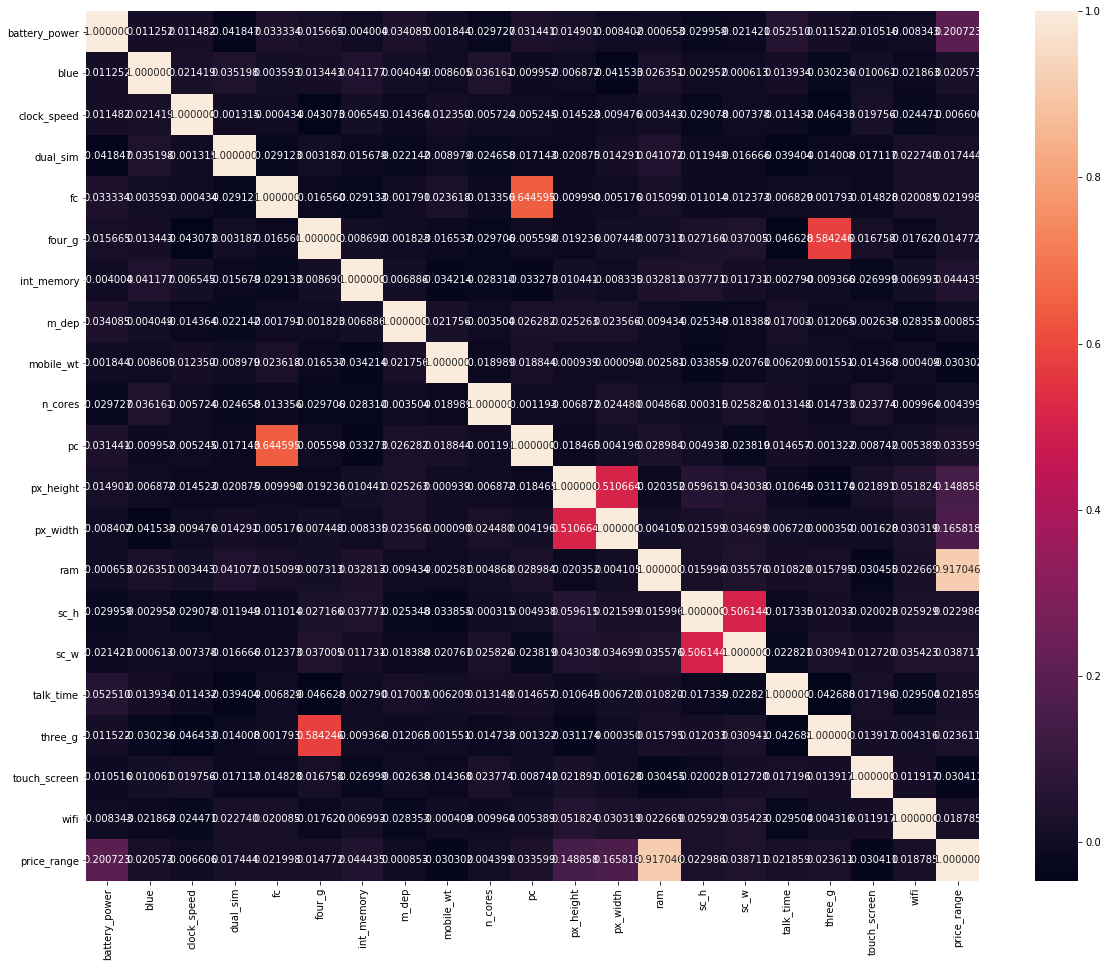

In [9]:
corrmat=train.corr()
fig=plt.figure(figsize=(20,16))
sns.heatmap(corrmat, annot=True, fmt="f")
#sns.heatmap(corrmat,vmax=.9,square=True)
plt.show()

In [176]:
from sklearn.model_selection import train_test_split
#training set
train_set=train.sample(frac=0.7,random_state=1)
#test set
test_set=train.loc[~train.index.isin(train_set.index)]
print(train_set.shape)
print(test_set.shape)

(1400, 21)
(600, 21)


In [59]:
train['ram'].describe()

count    2000.000000
mean     4248.426000
std      2169.464087
min       512.000000
25%      2415.000000
50%      4293.000000
75%      6129.000000
max      7996.000000
Name: ram, dtype: float64

In [531]:
col=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']
target='price_range'

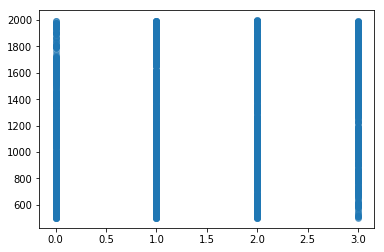

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)



x = train['price_range']
y = train['battery_power']

area = (30 * np.random.rand(10))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=.5)
plt.show()

In [178]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, max_depth=15,
                             random_state=12)
clf.fit(train_set[col],train_set[target])
predictions = clf.predict(test_set[col])

In [186]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(train_set[col],train_set[target])
predictions = clf.predict(test_set[col])

In [523]:
from xgboost import XGBClassifier
clf = XGBClassifier(learning_rate=0.6, n_estimators=170,  min_samples_split=8,
                    min_samples_leaf=5, max_depth=3)
clf.fit(train_set[col],train_set[target])
predictions = clf.predict(test_set[col])

/home/rohan/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [527]:
clf.fit(train[col],train[target])
predictions = clf.predict(test[col])

/home/rohan/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [519]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
                            
clf.fit(train_set[col],train_set[target])
predictions = clf.predict(test_set[col])

In [528]:
new_list = []
for item in predictions:
    new_list.append(int(round(item)))

In [529]:
print(new_list)

[3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2, 1, 1, 3, 1, 2, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3, 2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0, 0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2, 3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 1, 0, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 0, 0, 3, 0, 3, 0, 1, 2, 0, 2, 3, 1, 3, 2, 2, 1, 2, 0, 0, 0, 1, 3, 2, 0, 0, 0, 3, 2, 0, 2, 3, 1, 

In [526]:
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_score(test_set[target], new_list)

accuracy_score(test_set[target], new_list, normalize=False)

543

In [530]:
my_submission = pd.DataFrame({'id': test.id, 'price_range': new_list})

my_submission.to_csv('submission2.csv', index=False)